In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("placement.csv")

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

### 0. Preprocess + EDA(exploratory data analysis) + Feature Selection
### 1. Extract input and output cols
### 2. Scale the values
### 3. Train test split (cross validation)
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the model

In [19]:
import matplotlib.pyplot as plt

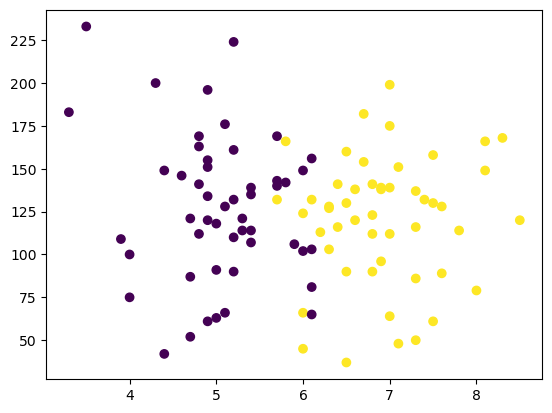

In [25]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [33]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [35]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [31]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [45]:
X_test

,cgpa,iq
26,7.0,199.0
72,7.3,116.0
49,5.4,135.0
10,6.0,45.0
56,6.1,65.0
37,8.1,149.0
15,5.1,176.0
43,6.8,141.0
8,6.1,156.0
78,6.1,81.0


In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [57]:
X_train

array([[-0.73140997, -1.47396785],
       [-0.4719084 , -0.23875134],
       [-1.68291571, -1.24236475],
       [ 2.03660673,  1.15086724],
       [ 0.56609786, -0.08434928],
       [ 1.17160151, -0.9592943 ],
       [ 1.43110308,  0.12152014],
       [ 0.91209995,  1.33100298],
       [-1.68291571, -0.59902282],
       [ 0.39309682,  0.45605795],
       [ 0.82559943,  0.40459059],
       [ 1.17160151,  0.35312324],
       [-0.90441101,  0.27592221],
       [-0.81791049, -1.55116888],
       [ 0.99860047,  0.71339472],
       [-1.16391258,  0.58472633],
       [-1.33691362, -2.09157611],
       [ 0.13359525, -0.52182179],
       [-1.42341414,  1.97434491],
       [-0.64490945, -0.34168605],
       [ 0.30659629,  0.09578647],
       [-0.99091153, -0.29021869],
       [-0.12590632,  0.48179163],
       [ 1.34460256,  0.1729875 ],
       [ 1.34460256, -1.60263624],
       [ 0.91209995, -0.29021869],
       [-2.28841936,  1.53687239],
       [-0.90441101, -1.60263624],
       [ 0.04709473,

In [59]:
X_test = scaler.transform(X_test)

In [61]:
X_test

array([[ 0.91209995,  1.94861123],
       [ 1.17160151, -0.18728398],
       [-0.4719084 ,  0.30165588],
       [ 0.04709473, -2.01437507],
       [ 0.13359525, -1.49970153],
       [ 1.86360569,  0.66192737],
       [-0.73140997,  1.35673665],
       [ 0.7390989 ,  0.45605795],
       [ 0.13359525,  0.84206311],
       [ 0.13359525, -1.08796269]])

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf = LogisticRegression()

In [73]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred = clf.predict(X_test)

In [77]:
y_test

26    1
72    1
49    0
10    1
56    0
37    1
15    0
43    1
8     0
78    0
Name: placement, dtype: int64

In [81]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test,y_pred)

0.7

In [94]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

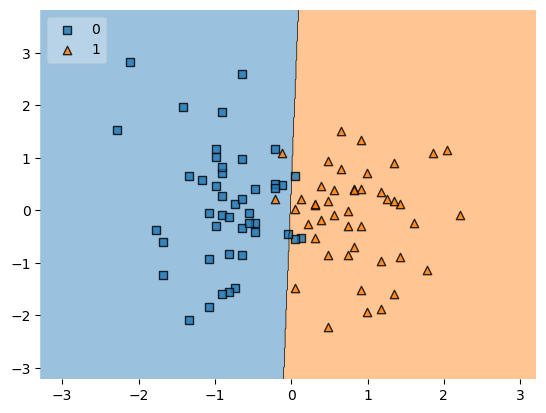

In [96]:
plot_decision_regions(X_train, y_train.values,clf=clf, legend=2)